#### Carga del fichero instances_val2017.json
Fichero que almacena como contenido info relativa a neusro conjunto de datos de validacion, donde se incluye la fecha de la imagen,
url de su origen, nombre e identificador

In [1]:
import json

# Path to the JSON file
instances_val = r"..\datasets\coco\annotations\instances_val2017.json"

# Load the JSON file
with open(instances_val, 'r') as file:
    data = json.load(file)

# Print a snippet of the data to verify
print(json.dumps(data, indent=4)[:1000])  # Print the first 500 characters


{
    "info": {
        "description": "COCO 2017 Dataset",
        "url": "http://cocodataset.org",
        "version": "1.0",
        "year": 2017,
        "contributor": "COCO Consortium",
        "date_created": "2017/09/01"
    },
    "licenses": [
        {
            "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
            "id": 1,
            "name": "Attribution-NonCommercial-ShareAlike License"
        },
        {
            "url": "http://creativecommons.org/licenses/by-nc/2.0/",
            "id": 2,
            "name": "Attribution-NonCommercial License"
        },
        {
            "url": "http://creativecommons.org/licenses/by-nc-nd/2.0/",
            "id": 3,
            "name": "Attribution-NonCommercial-NoDerivs License"
        },
        {
            "url": "http://creativecommons.org/licenses/by/2.0/",
            "id": 4,
            "name": "Attribution License"
        },
        {
            "url": "http://creativecommons.org/licenses/by-s

### Carga de fichero relativo a las labels de las imagenes
Ahora se realiza un análisis esxploratorio de la estructura de datos que conforma en este caso la información a predecir


In [2]:
import os

# Path to the folder containing .txt files
path_labels = r"..\datasets\coco\labels\val2017"

In [3]:
clases = {}


# Check if the folder exists
if os.path.exists(path_labels):
    # Iterate over all files in the directory
    for file_name in os.listdir(path_labels):
        # Check if the file has a .txt extension
        if file_name.endswith('.txt'):
            file_path = os.path.join(path_labels, file_name)
            
            # Open the file and process its lines
            with open(file_path, 'r') as file:
                #print(f"Processing file: {file_name}")
                for line in file:
                    # Split the line by spaces and get the first word
                    first_word = line.split()[0] if line.split() else None
                    if first_word:
                        if(first_word in  clases):
                            clases[first_word] +=1
                        else:
                            clases[first_word] =1




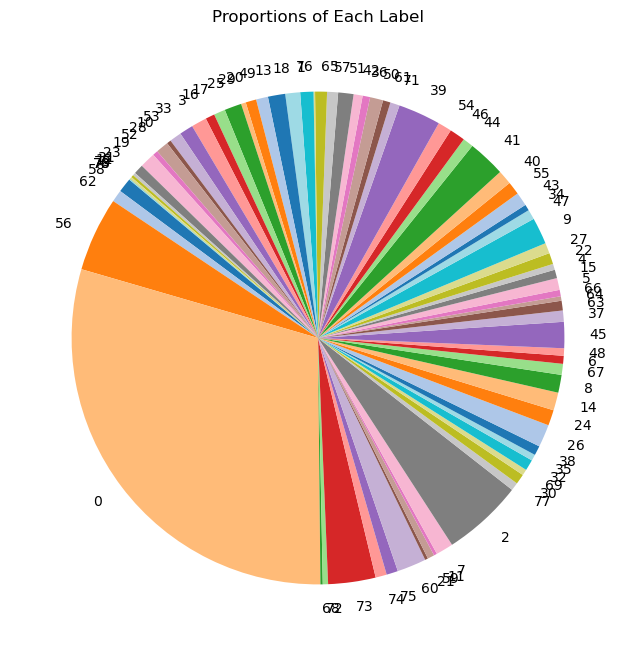

In [4]:
import matplotlib.pyplot as plt

# Extract labels and values
labels = list(clases.keys())
values = list(clases.values())

# Create a pie chart

plt.figure(figsize=(8, 8))
plt.pie(
    values,
    labels=labels,
    #autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title("Proportions of Each Label")
plt.show()

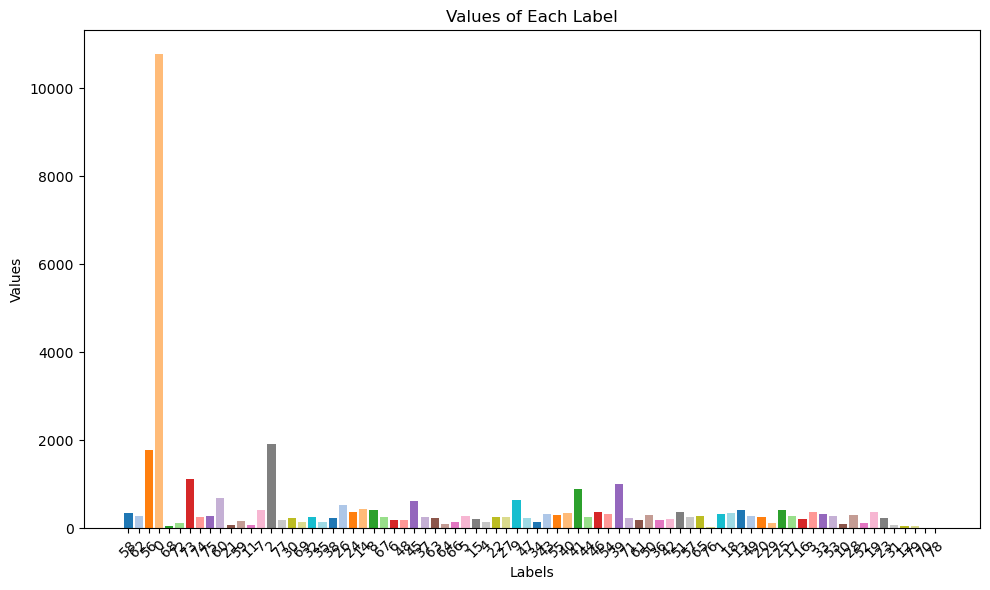

In [5]:
import matplotlib.pyplot as plt

# Extract labels and values
labels = list(clases.keys())
values = list(clases.values())

# Create a barplot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=plt.cm.tab20.colors[:len(labels)])
plt.xlabel("Labels")
plt.ylabel("Values")
plt.title("Values of Each Label")
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


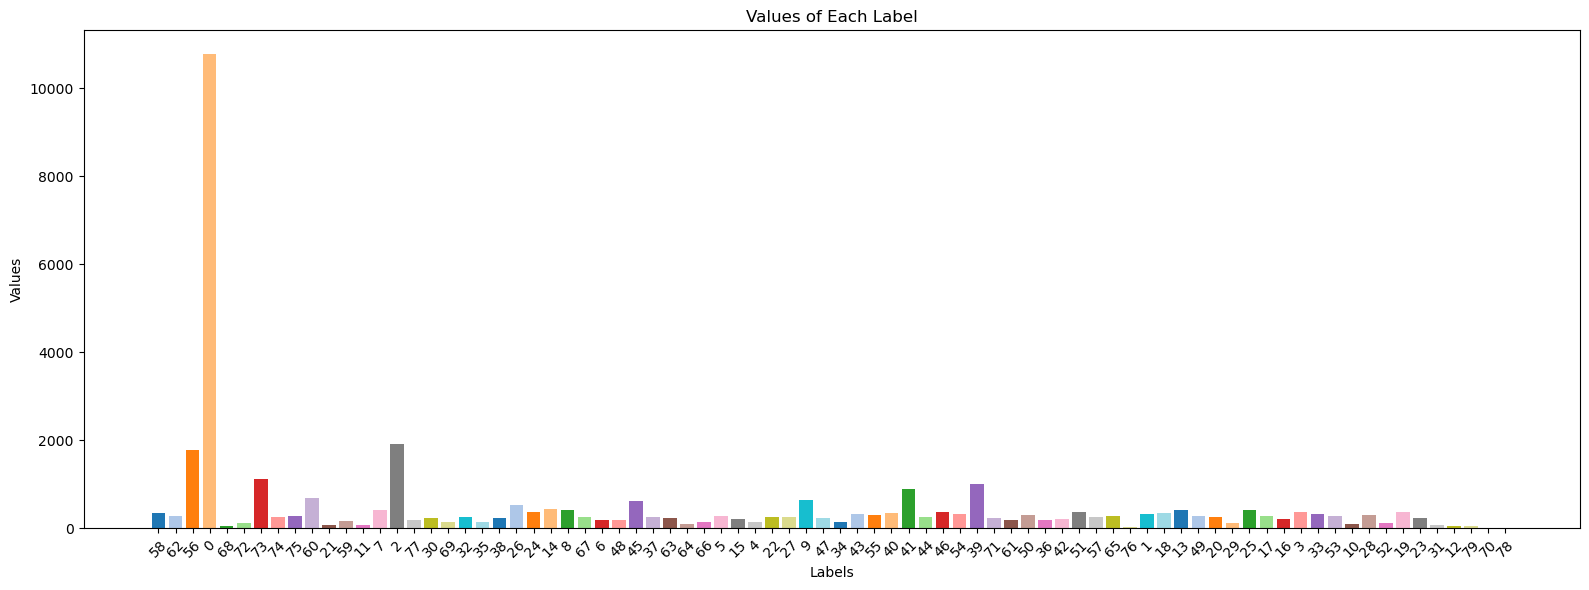

In [6]:
import matplotlib.pyplot as plt

# Extract labels and values
labels = list(clases.keys())
values = list(clases.values())

# Create a wider barplot
plt.figure(figsize=(16, 6))  # Increased the width of the figure
plt.bar(labels, values, color=plt.cm.tab20.colors[:len(labels)])
plt.xlabel("Labels")
plt.ylabel("Values")
plt.title("Values of Each Label")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


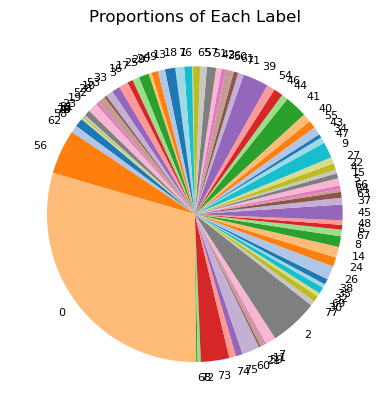

In [7]:
plt.pie(
    values,
    labels=labels,
    textprops={'fontsize': 8},  # Smaller font size
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title("Proportions of Each Label")
plt.show();

Ahora estudiamos la proporcion de aparicion en pares de las imagenes

In [ ]:
from itertools import combinations
from itertools import permutations

l = ["1", "2", "3"]

def possible_convinations_2(lista):
    pares = list(combinations(lista, 2))
    return pares


def possible_convinations_3(lista):
    pares = list(combinations(lista, 3))
    return pares

def possible_convinations_4(lista):
    pares = list(combinations(lista, 4))
    return pares


def possible_convinations_5(lista):
    pares = list(combinations(lista, 5))
    return pares


def concat_combinations(lista):
    permutaciones = permutations(lista)
    result = ['_'.join(p) for p in permutaciones]
    return result



['1_2_3', '1_3_2', '2_1_3', '2_3_1', '3_1_2', '3_2_1']

In [12]:
clases = {}
clases_equal_2 = {}
clases_equal_3 = {}
clases_equal_4 = {}
clases_equal_5 = {}

n_objects = {}

if os.path.exists(path_labels):

    for i,file_name in enumerate(os.listdir(path_labels)):

        if file_name.endswith('.txt'):
            
            file_path = os.path.join(path_labels, file_name)
            
            with open(file_path, 'r') as file:
                #print(f"Processing file: {file_name}")
                elems_fila  = [line.split()[0] if line.split() else None for line in file]
                clean_elems_fila = [elem for elem in elems_fila if elem!= None ]
                if(i%10==0):
                    print(f"elems fichero {i}:",clean_elems_fila)
                if(len(clean_elems_fila)==0):
                    n_objects[0] = 1 if 0 in n_objects else n_objects[0]+1
                else:
                    n_objects[len(clean_elems_fila)] =  n_objects[len(clean_elems_fila)]+1 if len(clean_elems_fila) in n_objects else 1

                    # Para hacerlo hasheable, primero ordenamos las instancias y luego concatenamos en orden ascendense
                    ordered_instances = sorted(clean_elems_fila)
                    str_ordered = "_".join(ordered_instances)

                    if(str_ordered in clases):
                        clases[str_ordered] +=1
                    else:
                        clases[str_ordered] =1

                    if(len(elems_fila)==2):
                        combinaciones = possible_convinations_2(ordered_instances)
                        for c in combinaciones:
                            cadena = c[0] + "_" + c[1]
                            cadena_2 = c[1] + "_" + c[0] 
                            clases_equal_2[cadena] =  clases_equal_2[cadena]+0.5 if cadena in clases_equal_2 else 0.5
                            clases_equal_2[cadena_2] =  clases_equal_2[cadena_2]+0.5 if cadena_2 in clases_equal_2 else 0.5

                    elif(len(elems_fila)==4):
                        combinaciones = possible_convinations_4(ordered_instances)
                        for c in combinaciones:
                            concatenadas = concat_combinations(c)
                            for concatenada in concatenadas:
                                clases_equal_4[concatenada] =  clases_equal_4[concatenada]+0.25 if concatenada in clases_equal_4 else 0.25

                    elif(len(elems_fila)==3):
                        combinaciones = possible_convinations_3(ordered_instances)
                        for c in combinaciones:
                            concatenadas = concat_combinations(c)
                            for concatenada in concatenadas:
                                clases_equal_3[concatenada] =  clases_equal_3[concatenada]+(1/3) if concatenada in clases_equal_3 else (1/3)

                    elif(len(elems_fila)==5):
                        combinaciones = possible_convinations_5(ordered_instances)
                        for c in combinaciones:
                            concatenadas = concat_combinations(c)
                            for concatenada in concatenadas:
                                clases_equal_5[concatenada] =  clases_equal_5[concatenada]+0.2 if concatenada in clases_equal_5 else 0.2
            


elems fichero 0: ['58', '62', '62', '56', '56', '56', '56', '0', '0', '68', '72', '73', '73', '74', '75', '75', '56', '75', '75', '60']
elems fichero 10: ['14', '8', '8', '0', '0', '0', '0', '67', '24', '26', '8']
elems fichero 20: ['22', '22']
elems fichero 30: ['0', '30']
elems fichero 40: ['60', '41', '42', '50', '50', '50', '51', '51', '51', '51', '44', '51']
elems fichero 50: ['0', '0', '0', '0', '0', '37', '37', '39', '0']
elems fichero 60: ['37', '0']
elems fichero 70: ['20', '20', '20', '20', '20']
elems fichero 80: ['74', '74']
elems fichero 90: ['0', '46', '46', '46', '46', '0', '0']
elems fichero 100: ['45', '45', '43', '48', '48', '60', '52']
elems fichero 110: ['1', '3', '0', '0', '1']
elems fichero 120: ['62', '41', '41', '42', '43', '53', '41', '41', '42', '53', '53', '60', '0', '42', '43']
elems fichero 130: ['0', '0', '36', '13', '13', '36', '13', '13']
elems fichero 140: ['56', '56', '33', '24', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '24', '24', '

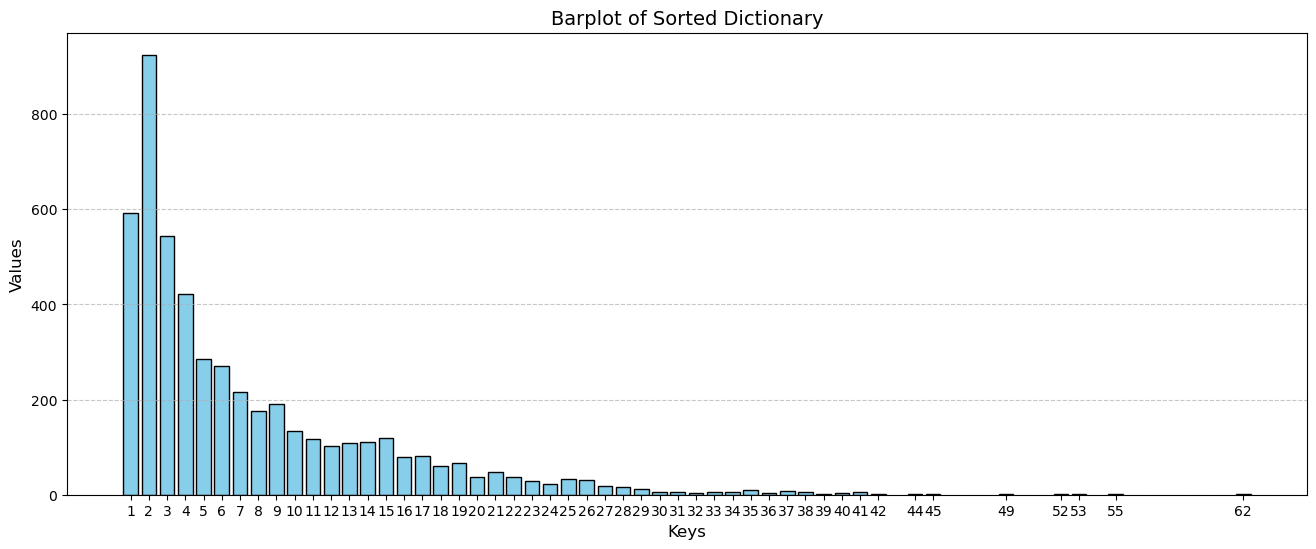

In [13]:
import matplotlib.pyplot as plt


sorted_data = dict(sorted(n_objects.items()))

keys = list(sorted_data.keys())
values = list(sorted_data.values())

plt.figure(figsize=(16, 6))
plt.bar(keys, values, color='skyblue', edgecolor='black')
plt.xlabel('Keys', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Barplot of Sorted Dictionary', fontsize=14)
plt.xticks(keys)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
def top_n_values(input_dict, n):
    """
    Devuelve un diccionario con las n claves que tienen los valores más altos.
    
    Args:
        input_dict (dict): El diccionario original.
        n (int): El número de pares clave-valor a incluir en el nuevo diccionario.
        
    Returns:
        dict: Un diccionario con las n claves de mayor valor.
    """
    if n <= 0:
        return {}
    
    # ordenación las claves del diccionario según sus valores, en orden descendente
    sorted_keys = sorted(input_dict, key=input_dict.get, reverse=True)
    
    top_keys = sorted_keys[:n]

    top_dict = {key: input_dict[key] for key in top_keys}
    
    return top_dict

In [14]:
clases_equal_2

{'0_30': 18.5,
 '30_0': 18.5,
 '69_72': 0.5,
 '72_69': 0.5,
 '45_48': 0.5,
 '48_45': 0.5,
 '0_37': 38.5,
 '37_0': 38.5,
 '15_66': 1.0,
 '66_15': 1.0,
 '22_22': 24.0,
 '45_47': 0.5,
 '47_45': 0.5,
 '46_54': 0.5,
 '54_46': 0.5,
 '0_36': 21.5,
 '36_0': 21.5,
 '0_27': 13.5,
 '27_0': 13.5,
 '0_67': 9.0,
 '67_0': 9.0,
 '4_4': 5.0,
 '46_46': 2.0,
 '71_71': 4.0,
 '47_49': 0.5,
 '49_47': 0.5,
 '0_20': 2.0,
 '20_0': 2.0,
 '74_74': 21.0,
 '1_10': 0.5,
 '10_1': 0.5,
 '0_25': 4.5,
 '25_0': 4.5,
 '0_35': 4.0,
 '35_0': 4.0,
 '61_71': 11.5,
 '71_61': 11.5,
 '56_63': 0.5,
 '63_56': 0.5,
 '46_60': 1.5,
 '60_46': 1.5,
 '55_60': 2.5,
 '60_55': 2.5,
 '0_29': 8.5,
 '29_0': 8.5,
 '15_72': 1.0,
 '72_15': 1.0,
 '2_6': 1.0,
 '6_2': 1.0,
 '15_59': 4.5,
 '59_15': 4.5,
 '40_63': 0.5,
 '63_40': 0.5,
 '0_50': 0.5,
 '50_0': 0.5,
 '21_21': 12.0,
 '0_52': 1.5,
 '52_0': 1.5,
 '56_75': 0.5,
 '75_56': 0.5,
 '18_18': 5.0,
 '23_23': 27.0,
 '26_28': 0.5,
 '28_26': 0.5,
 '15_2': 1.0,
 '2_15': 1.0,
 '0_31': 9.5,
 '31_0': 9.5,


Los 10 pares más repetidos por lo tanto son:

In [ ]:
n = 10  
top_n = sorted(data.items(), key=lambda item: item[1], reverse=True)[:n]

for index, (key, value) in enumerate(top_n, start=1):
    print(f"{index}: {set(key)} appears {value} times.")

Para obtener el nombre de una categoria a partir de su id se tiene:

In [ ]:
from pycocotools.coco import COCO

coco = COCO('annotations/instances_train2017.json')

category_id = 1  

category = coco.loadCats([category_id])

category_name = category[0]['name'] if category else None

print(f"Category ID {category_id} corresponds to: {category_name}")

La obtencion de un diccionario de categorias id frente a nombre es la siguiente:

In [ ]:
all_category_ids = coco.getCatIds()

all_categories = coco.loadCats(all_category_ids)

id_to_name = {cat['id']: cat['name'] for cat in all_categories}

print("Category ID to Name Mapping:")
for cat_id, name in id_to_name.items():
    print(f"{cat_id}: {name}")